<a href="https://www.kaggle.com/code/sahilkhan70/heart-disease-prediction?scriptVersionId=206121822" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/heart.csv


# 🔥 Heart Disease Prediction: Exploring the Pulse of Cardiovascular Health 🫀

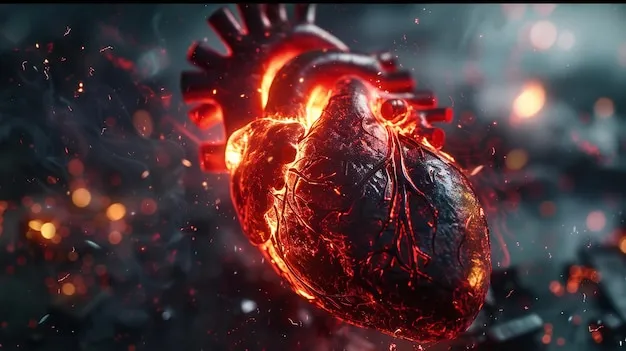️


Let's dive in and explore the pulse of cardiovascular health! ❤️

## **Importing Required Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [3]:
df = pd.read_csv("/kaggle/input/heart-disease/heart.csv")

In [4]:
# 10 random rows from dataset
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1


# Data Exploration

# Heart Disease Dataset - Feature Descriptions

| **Feature**   | **Description** |
|---------------|-----------------|
| **age**       | Age of the patient in years. |
| **sex**       | Gender of the patient, where `1` = male and `0` = female. |
| **cp**        | Chest pain type experienced by the patient: <br> `0`: Typical angina (related to reduced blood flow to the heart)<br> `1`: Atypical angina (not related to heart issues)<br> `2`: Non-anginal pain (non-heart-related chest pain)<br> `3`: Asymptomatic (no chest pain). |
| **trestbps**  | Resting blood pressure (in mm Hg) measured on admission to the hospital. High values may indicate hypertension. |
| **chol**      | Serum cholesterol in mg/dl. Higher cholesterol levels are associated with higher risk of heart disease. |
| **fbs**       | Fasting blood sugar level. Indicates if fasting blood sugar > 120 mg/dl: <br> `1` = True (higher risk of diabetes) <br> `0` = False (normal). |
| **restecg**   | Resting electrocardiographic results: <br> `0`: Normal <br> `1`: ST-T wave abnormality (e.g., T wave inversions, ST elevation/depression > 0.05 mV) <br> `2`: Probable/definite left ventricular hypertrophy based on Estes' criteria. |
| **thalach**   | Maximum heart rate achieved during the test. Lower heart rate may indicate poorer physical fitness or issues with heart function. |
| **exang**     | Exercise-induced angina (chest pain during exercise): <br> `1` = Yes (exercise-induced chest pain)<br> `0` = No. |
| **oldpeak**   | ST depression induced by exercise relative to rest. Higher values indicate potential risk of heart problems. |
| **slope**     | Slope of the peak exercise ST segment: <br> `0`: Upsloping (normal response)<br> `1`: Flat (abnormal response)<br> `2`: Downsloping (may indicate heart problems). |
| **ca**        | Number of major vessels (0-3) colored by fluoroscopy. Higher counts indicate more serious blockages in major heart vessels. |
| **thal**      | Type of thalassemia blood disorder: <br> `0`: Error/missing value <br> `1`: Fixed defect (permanent defect, such as scar tissue) <br> `2`: Normal (no defect) <br> `3`: Reversible defect (defect that goes away after exercise). |
| **target**    | Presence of heart disease: <br> `0` = No disease <br> `1` = Disease. |


In [5]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

The gender count is correct, so we can with further analysis.

In [6]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 303 rows and 14 columns.


Although, It is a very small dataset. So we can easily achieve high accuracy with simple models.

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Great, there is no null values in the data.

In [8]:
df.drop(columns=['sex', 'target'], axis = 1).describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


# Data Pre-Processing

By comparing with the actual dataset, find out that the dataset contain some, misleading data points in it, so we have to remove those from our dataset, to move further

The values are incorrect in these columns.

thal (thalassemia) : Thalassemia type, related to red blood cell abnormalities.

- 0: Error (or NaN, possibly an incomplete observation)
- 1: Fixed defect – Indicates a past myocardial infarction or other fixed defect.
- 2: Normal – No defect present.
- 3: Reversible defect – Possible ischemia (temporary reduction in blood flow that may be treatable).

ca (number of major vessels colored by fluoroscopy): The number of major blood vessels (ranging from 0 to 3) that are visible when a fluoroscopic dye is applied.

- Values: Values range from 0 to 3, with higher values indicating more visible vessels.
- Purpose: More visible vessels can indicate less blockage, while fewer visible vessels may suggest restricted blood flow due to blockage.

In [9]:
df[(df['ca'] > 3) | (df['thal'] == 0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


so these 7 rows will be removed from the dataset.

In [10]:
# dataset will be

df = df[~((df['ca'] > 3) | (df['thal'] == 0))].copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.shape

(296, 14)

# Data Visualization

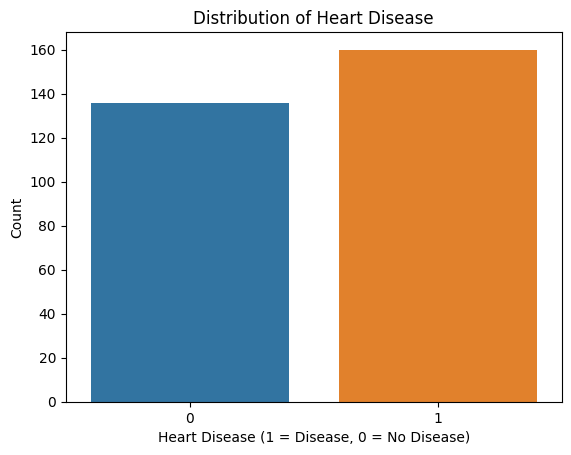

In [12]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (1 = Disease, 0 = No Disease)')
plt.ylabel('Count')
plt.show()

The dataset is quite balanced.

In [13]:
# # Plotting each feature with corresponds to all other features
# sns.pairplot(df, hue = 'target')
# plt.show()

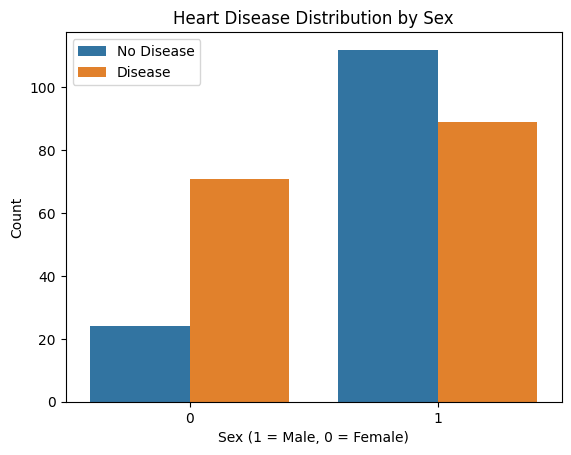

In [14]:
# Plot the distribution of heart disease by sex
sns.countplot(x = 'sex', hue = 'target', data = df)
plt.title('Heart Disease Distribution by Sex')
plt.xlabel('Sex (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.show()

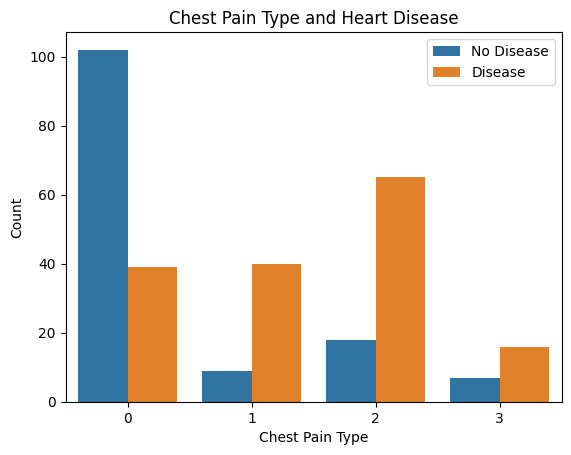

In [15]:
# Plot distribution of chest pain types in relation to heart disease
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type and Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.show()

## Analyzing Continuous Features

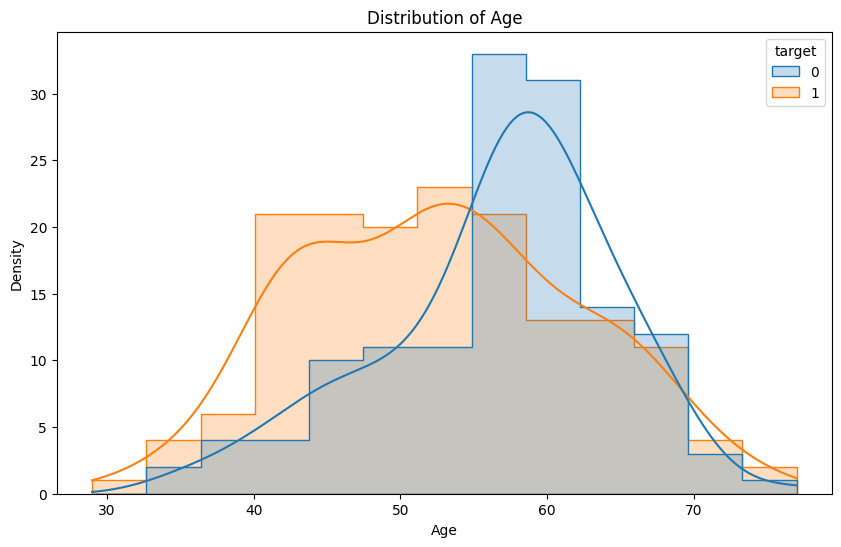

In [16]:
# Plot the distribution of Age w.r.t heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x = 'age', hue='target', kde=True, element='step')
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

People in the range 55 to 63 years of age are having more chances of heart disease.

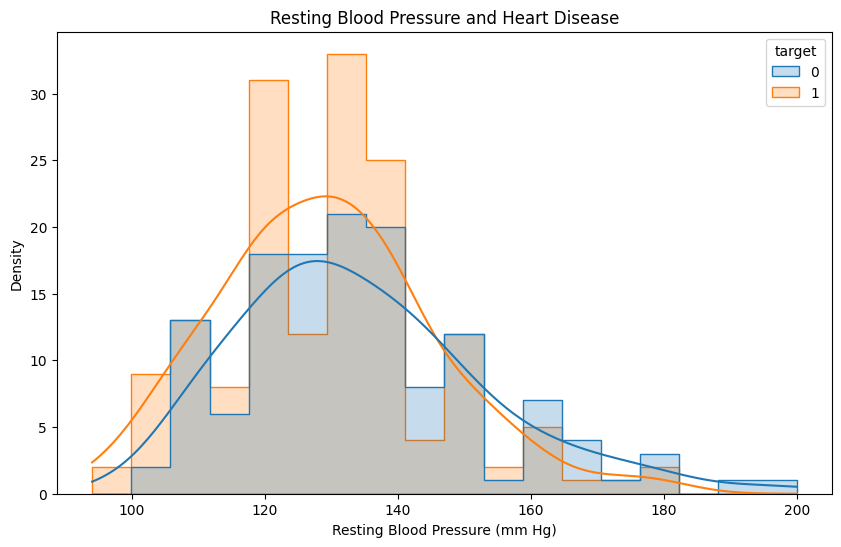

In [17]:
# Distribution of trestbps with respect to heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='trestbps', hue='target', kde=True, element='step')
plt.title('Resting Blood Pressure and Heart Disease')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Density')
plt.show()

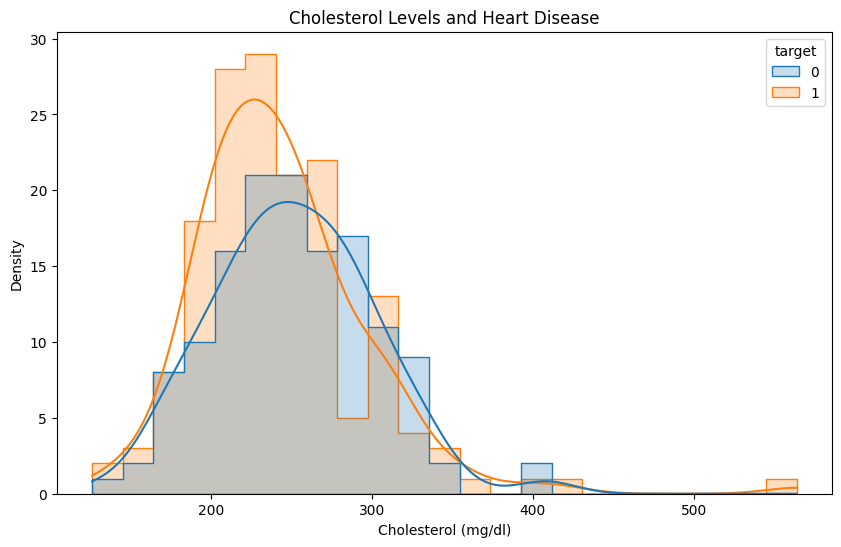

In [18]:
# Distribution of cholesterol with respect to heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='chol', hue='target', kde=True, element='step')
plt.title('Cholesterol Levels and Heart Disease')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Density')
plt.show()

These all are normally distributed.

## Analyzing Relationships Between Features

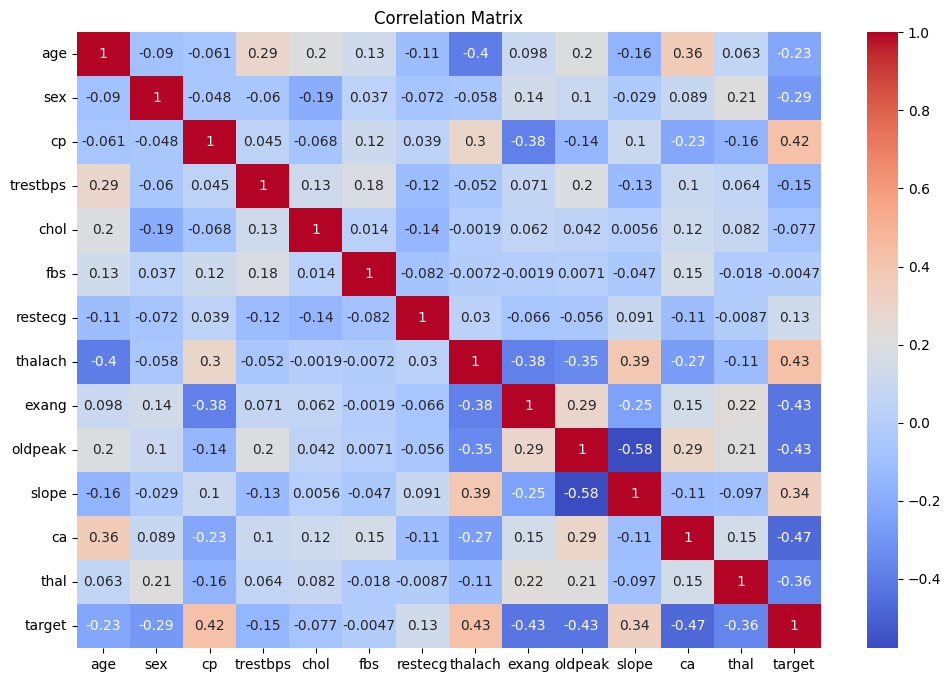

In [19]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Each feature except "fbs" are correlated with the target. Each of these features will effectively contribute in the prediction of heart disease, which is actually true because the dataset creators already removed the irrelevant columns of test from the dataset and keept only the factors that contribute to heart disease.

**Let's find out Age and maximum heart rate can reveal some patterns related to heart health.**

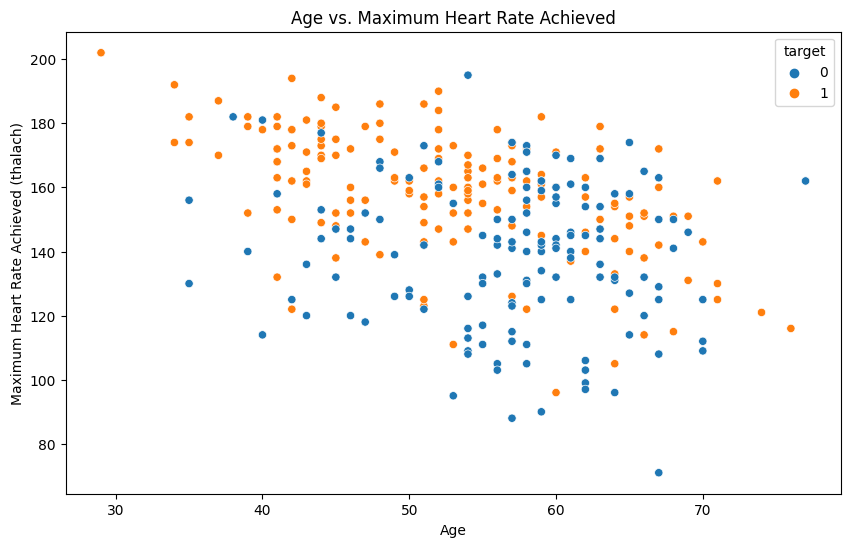

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='target')
plt.title("Age vs. Maximum Heart Rate Achieved")
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.show()

There is actually a trend, people with maximum heart rate having higher chance of heart disease, also if the age is large then average heart rate can also cause disease. 

**Analyzing `fbs` column**

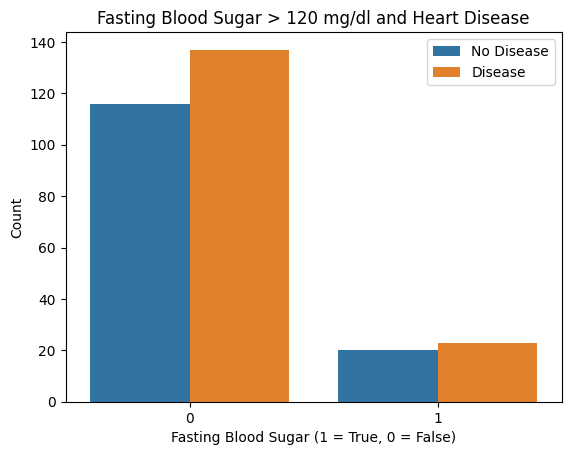

In [21]:
# Plot distribution of heart disease by fasting blood sugar
sns.countplot(x='fbs', hue='target', data=df)
plt.title('Fasting Blood Sugar > 120 mg/dl and Heart Disease')
plt.xlabel('Fasting Blood Sugar (1 = True, 0 = False)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.show()

Higher fasting blood sugar could correlate with a higher prevalence of heart disease.

**`slope`, `ca`, and `thal` with Heart Disease**

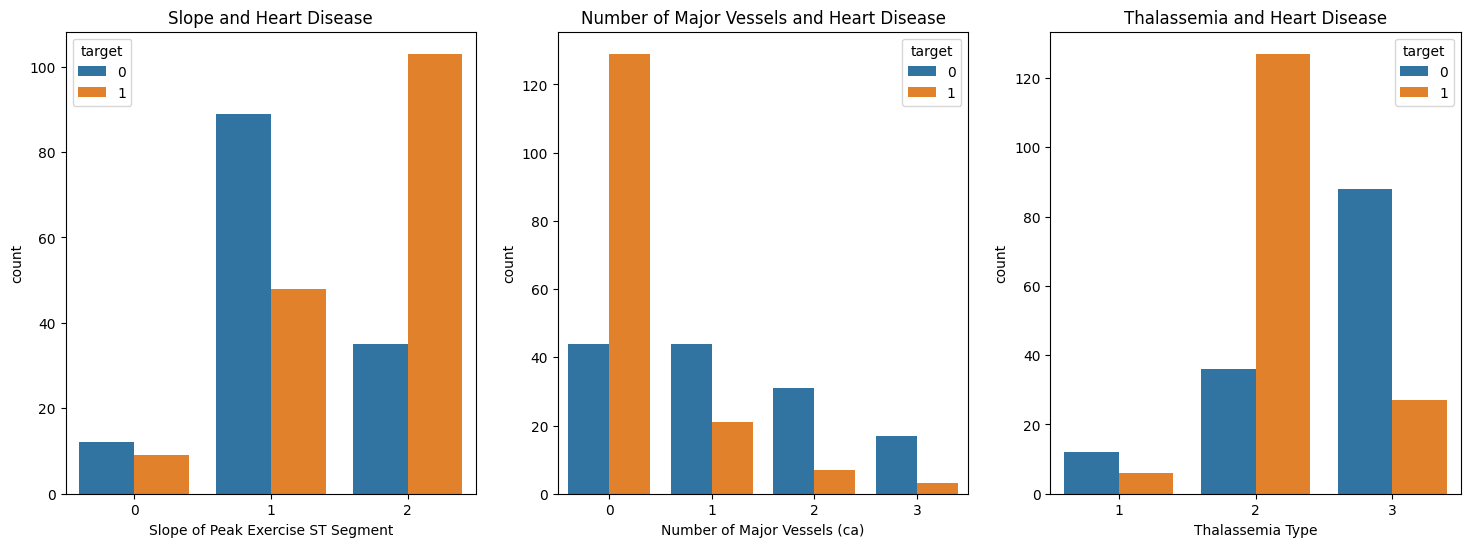

In [22]:
# Plot distribution of slope, ca, and thal with heart disease
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(x='slope', hue='target', data=df, ax=ax[0])
ax[0].set_title('Slope and Heart Disease')
ax[0].set_xlabel('Slope of Peak Exercise ST Segment')

sns.countplot(x='ca', hue='target', data=df, ax = ax[1])
ax[1].set_title('Number of Major Vessels and Heart Disease')
ax[1].set_xlabel('Number of Major Vessels (ca)')

sns.countplot(x='thal', hue='target', data=df, ax = ax[2])
ax[2].set_title('Thalassemia and Heart Disease')
ax[2].set_xlabel('Thalassemia Type')
plt.show()

# Building the Models

## Splitting the data

In [23]:
X = df.drop('target', axis=1)
y = df['target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [25]:
print(f"The size of the train set is {X_train.shape} and test set is {X_test.shape}.")

The size of the train set is (236, 13) and test set is (60, 13).


## Standardizing the inputs for SVC and LogisticRegression

In [26]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

## Instantiating the models

In [27]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier()

## Training the models

In [28]:
lr.fit(X_train_stand, y_train)
knn.fit(X_train_stand, y_train)
svc.fit(X_train_stand, y_train)

SVC()

In [29]:
for model in [lr, knn, svc]:
    y_pred = model.predict(X_test_stand)
    print(f"Accuracy of {model.__class__.__name__} : {accuracy_score(y_test, y_pred) *100}%")

Accuracy of LogisticRegression : 90.0%
Accuracy of KNeighborsClassifier : 88.33333333333333%
Accuracy of SVC : 88.33333333333333%


**Cross Validating the models**

In [30]:
for model in [lr, knn, svc]:
    print(f"Accuracy of {model.__class__.__name__} for 5 folds is : {np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=5)) *100}%")

Accuracy of LogisticRegression for 5 folds is : 85.80790960451978%
Accuracy of KNeighborsClassifier for 5 folds is : 65.89830508474577%
Accuracy of SVC for 5 folds is : 66.2316384180791%


But with this problem Accuracy is not a good metric to evaulate the models, Model can do Type 2 error, means it can wrongly predict the person doesn't have heart disease but in reality that person has (False Negative), FN is costly.  

So we will use the **Recall Score** to evaluate the model.

In [31]:
for model in [lr, knn, svc]:
    print(f"The recall score of {model.__class__.__name__} for 5 folds is : {np.mean(cross_val_score(model, X, y, scoring='recall', cv=5))*100}%")

The recall score of LogisticRegression for 5 folds is : 91.875%
The recall score of KNeighborsClassifier for 5 folds is : 73.125%
The recall score of SVC for 5 folds is : 84.375%


The recall score of Logistic Regression is higher, so it is performing best till now.

Now lets, train the random forest

In [32]:
# Random forest is a tree based model, which doesn't require scaling.
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = rf.predict(X_test)

In [34]:
print(f"Accuracy Score of {rf.__class__.__name__} is {accuracy_score(y_test, y_pred) * 100}%")
print(f"Recall Score of {rf.__class__.__name__} is {recall_score(y_test, y_pred) * 100}%")
print(f"Precision Score of {rf.__class__.__name__} is {precision_score(y_test, y_pred) * 100}%")

Accuracy Score of RandomForestClassifier is 81.66666666666667%
Recall Score of RandomForestClassifier is 90.625%
Precision Score of RandomForestClassifier is 78.37837837837837%


In [35]:
# Performing 5 Fold Cross Validation
print(f"Recall Score of {rf.__class__.__name__} is {np.mean(cross_val_score(rf, X, y, cv=5,scoring='recall')) * 100}%")

Recall Score of RandomForestClassifier is 86.25%


Quite good score without tuning a single parameter. Now lets apply hyper parameter tuning to both Logistic Regression and Random Forest and then compare their scores to choose the best model.

# Hyper Parameter Tuning of Random Forest